In [2]:
import os,csv,json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import SimpleITK as sitk
import tifffile as tif
import seaborn as sns
sys.path.append("/home/emilyjanedennis/Desktop/GitHub/rat_BrainPipe/")
#from tools.analysis.transform_points import transform_points

In [3]:
#basepath = "/home/emilyjanedennis/Desktop/for_registration_to_lightsheet/output_dirs"
basepath = "/Users/emilydennis/Desktop/ratmouse"
# SIGMA annotations 
sigma_ann_filename = os.path.join(basepath,"SIGMA_ann_in_PRA_25/SIGMA_in_PRA.tif")

#WHS annotations 
whs_ann_filename = os.path.join(basepath,"PMA_ann_in_PRA_25/PMA_ann_in_PRA.tif")


In [52]:
sigma =tif.imread(sigma_ann_filename)
whs = tif.imread(whs_ann_filename)

28864

In [163]:
sigma_vals_to_use = [291,292,321,322,331,332,621,622,631,632,641,642]
whs_vals_to_use = [421,973,573,613,74,121,593,821,721,778,33,305,750,269,869,902,377,393,805,41,501,565,257,469,312782656,312782592,312782624,669,1074,905,1114,233,601,649,281,1066,401,433,1046,441]

In [51]:
sigma_bool = np.zeros(np.shape(sigma))
whs_bool = np.zeros(np.shape(whs))

In [165]:
sigma_bool[np.isin(sigma,sigma_vals_to_use)]=1
whs_bool[np.isin(whs,whs_vals_to_use)]=1

In [166]:
np.sum(sigma_bool)-np.sum(whs_bool)

159945.0

In [167]:
tif.imsave(os.path.join(basepath,'sigma_vis_in_PRA.tif'),sigma_bool)
tif.imsave(os.path.join(basepath,'pma_vis_in_PRA.tif'),whs_bool)

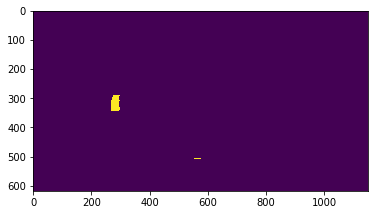

In [21]:
plt.imshow(whs_bool[:,:,220])
plt.show()

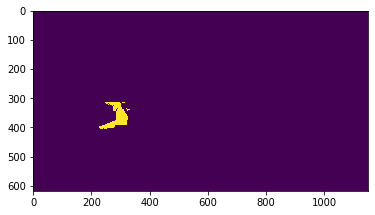

In [22]:
plt.imshow(sigma_bool[:,:,220])
plt.show()

In [5]:
# if you want to plot some points (potential injection sites) in multiple atlases
xs=[140,127,104,177,142,114,138,178,36,72,154,194,204,36,106,174,154]

ys = [186,189,212,251,252,234,236,240,492,596,596,538,436,534,308,222,219]

zs = [276,373,373,373,344,323,323,323,351,157,145,153,161,376,416,381,353]

In [54]:
sigma_bool = np.array(sigma,copy=True)
pma_bool = np.array(whs,copy=True)

1162 28864


In [56]:
sigma_bool[sigma_bool!=0]=1
pma_bool[pma_bool!=0]=1

1 1
1162 28864


In [57]:
# for each region you care about, give it a new number
vis = 10
visc = 20
rsp = 100
aud = 200
ss = 300
mo = 400
ppc = 500
fra = 600
ofc = 610
pl = 620
cg = 630
aca = 640


#list of regions for each xyz point IN ORDER
newsigmalist = [fra,fra,ofc,pl,cg,cg,cg,pl,mo,ppc,aud,aud,aud,ppc,ss,ofc,mo,mo]
newpmalist = [fra,mo,mo,ofc,pl,aca,pl,ofc,rsc,aud,aud,visc,visc,vis,mo,ofc,pl]

#list of regionIDs for each xyz point IN ORDER
sigmalist = [162,162,112,462,502,502,502,462,712,401,491,491,211,312,552,112,712,712]
pmalist = [667,962,767,630,363,935,171,582,434,643,1023,857,1058,401,1066,943,630,84]


In [58]:
for idx in range(0,np.size(newsigmalist)-1):
    # for each point, you have a number from each atlas
    # and a new number to replace it
    sigma_bool[sigma==sigmalist[idx]]=newsigmalist[idx]
    pma_bool[whs==pmalist[idx]]=newpmalist[idx]

In [59]:

print(np.max(sigma_bool),np.max(pma_bool))
print(np.max(sigma),np.max(whs))

630 640
1162 28864


In [60]:
for idx in range(0,np.size(xs)-1):
    sigma_bool[zs[idx],ys[idx],xs[idx]]=1000
    pma_bool[zs[idx],ys[idx],xs[idx]]=1000

In [63]:
tif.imsave(os.path.join(basepath,'sigma_inj_map.tif'),sigma_bool)
tif.imsave(os.path.join(basepath,'pma_inj_map.tif'),pma_bool)